In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


In [3]:
stock_data = pd.read_csv('../data/staged/mart_ipo_analytics_20260130.csv')

In [4]:
stock_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ticker                     728 non-null    str    
 1   company_name               728 non-null    str    
 2   ipo_start_dt               728 non-null    str    
 3   ipo_end_dt                 728 non-null    str    
 4   listing_dt                 728 non-null    str    
 5   security_type              728 non-null    str    
 6   issue_price                728 non-null    int64  
 7   total_issued_in_cr         728 non-null    float64
 8   subscription_qib_times     502 non-null    float64
 9   subscription_nii_times     706 non-null    float64
 10  subscription_retail_times  703 non-null    float64
 11  subscription_total_times   708 non-null    float64
 12  ipo_type                   728 non-null    str    
 13  ipo_year                   728 non-null    int64  
 14  secto

In [5]:
stock_data.head()

,ticker,company_name,ipo_start_dt,ipo_end_dt,listing_dt,security_type,issue_price,total_issued_in_cr,subscription_qib_times,subscription_nii_times,...,subindustry,current_market_cap,current_price,current_pe_ratio,current_roe_ratio,current_pb_ratio,return_4week_pct,return_1day_pct,listing_gains_pct,etl_processed_timestamp
0,KRISHNADEF,Krishna Defence And Allied Industries Limited,2022-03-25,2022-03-29,2025-12-30,SME,39,11.89,8.84,159.90,...,Industrial Machinery,1472.284081,986.85,66.438812,18.628110,11.198631,21.833333,3.189209,2430.38,2026-01-30 02:07:16.311072+05:30
1,LEMERITE,LE MERITE EXPORTS LIMITED,2022-04-25,2022-04-28,2025-12-12,SME,75,48.00,NaN,15.27,...,Textiles,1106.431200,454.20,181.680000,5.950752,9.821848,1.838565,-1.698950,505.60,2026-01-30 02:07:16.311072+05:30
2,KNAGRI,KN Agri Resources Limited,2022-03-15,2022-03-17,2025-12-09,SME,75,49.38,10.66,771.64,...,Agro Products,418.156768,167.27,11.286283,11.140679,1.189601,-16.365000,3.336010,123.03,2026-01-30 02:07:16.311072+05:30
3,ROCKPP,Rockingdeals Circular Economy Limited,2023-11-22,2023-11-24,2025-11-28,SME,140,21.00,47.38,458.60,...,NaN,NaN,73.70,0.000000,0.000000,0.000000,-16.250000,0.000000,-47.36,2026-01-30 02:07:16.311072+05:30
4,SOLEX,Solex Energy Limited,2018-01-22,2018-01-25,2025-10-08,SME,52,7.18,NaN,15.40,...,Industrial Machinery,1041.143890,963.80,24.771446,40.460146,6.445913,-26.461163,-4.070867,1753.46,2026-01-30 02:07:16.311072+05:30


In [6]:
df = stock_data.copy()

In [7]:
df['listing_gain_flag'] = (df['listing_gains_pct'] > 0).astype(int)

In [8]:
#dropping everything not known before listing

leakage_cols = [
    'listing_gains_pct',
    'current_price',
    'current_market_cap',
    'current_pe_ratio',
    'current_roe_ratio',
    'current_pb_ratio',
    'return_1day_pct',
    'return_4week_pct',
    'etl_processed_timestamp'
]

df = df.drop(columns= leakage_cols, errors = 'ignore')

In [9]:
df = df.drop(columns = ['ticker','company_name'])

In [10]:
df.head()

,ipo_start_dt,ipo_end_dt,listing_dt,security_type,issue_price,total_issued_in_cr,subscription_qib_times,subscription_nii_times,subscription_retail_times,subscription_total_times,ipo_type,ipo_year,sector,subindustry,listing_gain_flag
0,2022-03-25,2022-03-29,2025-12-30,SME,39,11.89,8.84,159.90,132.28,74.84,SME,2022,Industrials,Industrial Machinery,1
1,2022-04-25,2022-04-28,2025-12-12,SME,75,48.00,NaN,15.27,16.10,15.69,SME,2022,Consumer Discretionary,Textiles,1
2,2022-03-15,2022-03-17,2025-12-09,SME,75,49.38,10.66,771.64,87.52,151.90,SME,2022,Consumer Staples,Agro Products,1
3,2023-11-22,2023-11-24,2025-11-28,SME,140,21.00,47.38,458.60,201.42,213.64,SME,2023,NaN,NaN,0
4,2018-01-22,2018-01-25,2025-10-08,SME,52,7.18,NaN,15.40,24.91,20.21,SME,2018,Industrials,Industrial Machinery,1


In [11]:
#log transforming 

df['log_issue_price'] = np.log1p(df['issue_price'])
df['log_total_issued_in_cr'] = np.log1p(df['total_issued_in_cr'])
df['log_sub_total_times'] = np.log1p(df['subscription_total_times'])

In [ ]:
# calculating institutional buyers dominance

df['qib_retail_ratio'] = df['subscription_qib_times'] / (df['subscription_retail_times'] + 1)             #Drop from final table

(array([307.,  61.,  18.,  27.,  20.,  14.,   8.,   6.,   9.,   4.,   1.,
          3.,   6.,   1.,   4.,   1.,   1.,   4.,   1.,   1.]),
 array([1.42051860e-02, 1.46480134e+00, 2.91539749e+00, 4.36599365e+00,
        5.81658980e+00, 7.26718596e+00, 8.71778211e+00, 1.01683783e+01,
        1.16189744e+01, 1.30695706e+01, 1.45201667e+01, 1.59707629e+01,
        1.74213590e+01, 1.88719552e+01, 2.03225513e+01, 2.17731475e+01,
        2.32237437e+01, 2.46743398e+01, 2.61249360e+01, 2.75755321e+01,
        2.90261283e+01]),
 <BarContainer object of 20 artists>)

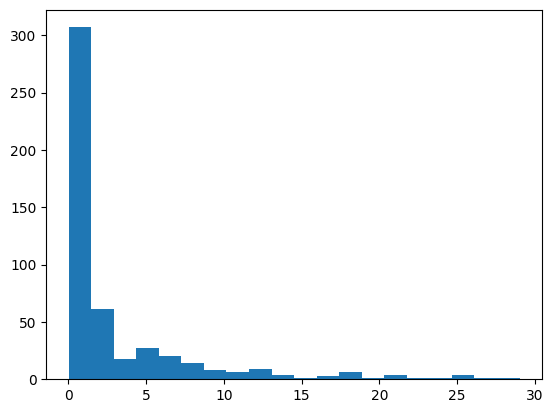

In [18]:
plt.hist(df['qib_retail_ratio'], bins = 20)

In [ ]:
# calculating institutional buyers dominance (log)

df['log_qib_retail_ratio'] = np.log1p(df['subscription_qib_times']) - np.log1p(df['subscription_retail_times'])       # Keep in final table

(array([ 3.,  1.,  1.,  7.,  8., 17., 37., 51., 43., 40., 57., 41., 36.,
        30., 20., 39., 24., 18., 12., 12.]),
 array([-3.7108915 , -3.3565296 , -3.00216771, -2.64780581, -2.29344392,
        -1.93908202, -1.58472013, -1.23035823, -0.87599634, -0.52163444,
        -0.16727255,  0.18708935,  0.54145124,  0.89581314,  1.25017503,
         1.60453693,  1.95889882,  2.31326072,  2.66762261,  3.02198451,
         3.3763464 ]),
 <BarContainer object of 20 artists>)

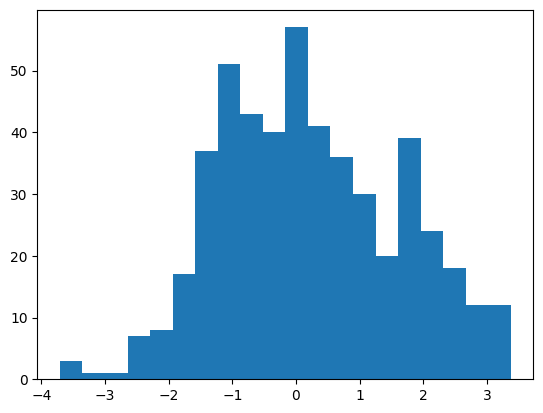

In [16]:
plt.hist(df['log_qib_retail_ratio'], bins = 20)

In [20]:
# calculating subscription intensity

log_sub = np.log1p(df['subscription_total_times'])
threshold = log_sub.quantile(0.8)

df['high_subscription_flag'] = (log_sub >= threshold).astype(int)



In [25]:
df['listing_dt'] = pd.to_datetime(df['listing_dt'])
df['listing_month'] = df['listing_dt'].dt.month
df['listing_quarter'] = df['listing_dt'].dt.quarter

In [26]:
df.head()

,ipo_start_dt,ipo_end_dt,listing_dt,security_type,issue_price,total_issued_in_cr,subscription_qib_times,subscription_nii_times,subscription_retail_times,subscription_total_times,...,listing_gain_flag,log_issue_price,log_total_issued_in_cr,log_sub_total_times,qib_retail_ratio,log_qib_retail_ratio,high_subscription_flag,sub_decile,listing_month,listing_quarter
0,2022-03-25,2022-03-29,2025-12-30,SME,39,11.89,8.84,159.90,132.28,74.84,...,1,3.688879,2.556452,4.328626,0.066327,-2.605996,0,"(67.44, 102.598]",12,4
1,2022-04-25,2022-04-28,2025-12-12,SME,75,48.00,NaN,15.27,16.10,15.69,...,1,4.330733,3.891820,2.814810,NaN,NaN,0,"(8.155, 17.668]",12,4
2,2022-03-15,2022-03-17,2025-12-09,SME,75,49.38,10.66,771.64,87.52,151.90,...,1,4.330733,3.919594,5.029784,0.120425,-2.027064,0,"(102.598, 171.972]",12,4
3,2023-11-22,2023-11-24,2025-11-28,SME,140,21.00,47.38,458.60,201.42,213.64,...,0,4.948760,3.091042,5.368962,0.234068,-1.431258,1,"(171.972, 295.129]",11,4
4,2018-01-22,2018-01-25,2025-10-08,SME,52,7.18,NaN,15.40,24.91,20.21,...,1,3.970292,2.101692,3.054473,NaN,NaN,0,"(17.668, 39.33]",10,4
